## Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Funções

In [ ]:
def model_li(omega, a, w, d, mi, c, t, rho_0):
  omega = omega*2*np.pi
  l = 6.35*a
  S = a**2
  S_linha = w**2
  p = (np.pi*(d**2))/(4*S)
  K = (d/2)*np.sqrt((rho_0*omega)/mi)
  yc = -(S/S_linha)*(1/np.tan((omega * l)/c))
  xh = ((32*mi*t)/(p*c*(d**2)))*(np.sqrt(1+((K**2)/32))+((np.sqrt(2)*K*d)/(8*t)))
  yh = ((omega*t)/(p*c))*(1+(1/(np.sqrt(9+((K**2)/2))))+(0.85*(d/t)))
  alpha = (4*xh)/(((1+xh)**2)+((yh+yc)**2))
  return alpha, xh, yh, yc

## Definição dos Parâmetros

In [ ]:
## Parâmetros da Metasuperfície
d = 3.5e-3 #Diâmetro da Perfuração
t = 0.2e-3 #Espessura do Painel
a = 100e-3 #Lado da Célula Unitária
w = 12e-3 #Espessura da Camara de Ar
b = 1e-3 #Largura da Parede do Espaço Enrolado

In [ ]:
## Parâmetros do Fluido (Ar)
c = 343 #Velocidade do Som
mi = 1.56e-5 #Viscosidade Dinâmica do ar
rho_0 = 1.21 #Densidade do ar

## Parte (a) - Absorção Sonora, Reatância e Resistência

In [ ]:
omega = np.arange(100,150,0.1)
alpha_a, xh_a, yh_a, yc_a = model_li(
    omega=omega,
    a=a,
    w=w,
    d=d,
    mi=mi,
    c=c,
    t=t,
    rho_0=rho_0
)

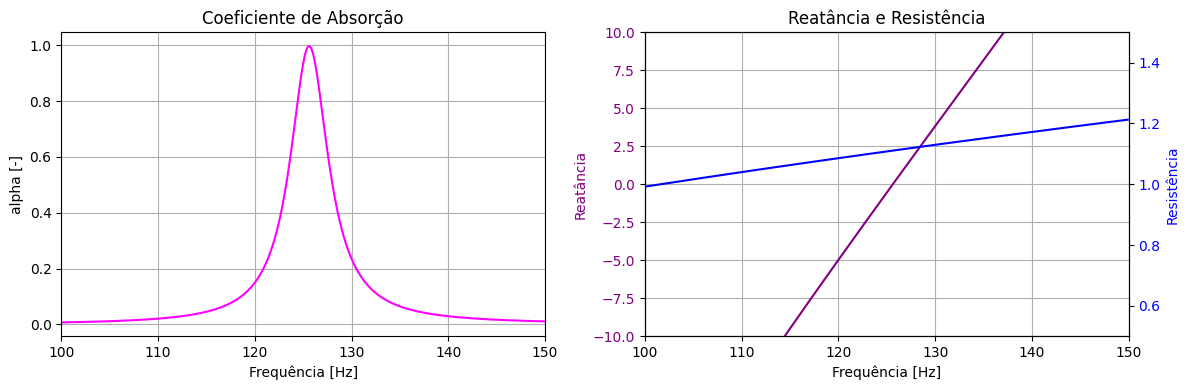

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(omega, alpha_a, label='Curva 1', color='magenta')
ax1.set_title('Coeficiente de Absorção')
ax1.set_xlabel('Frequência [Hz]')
ax1.set_ylabel('alpha [-]')
ax1.set_xlim([100,150])
ax1.grid(True)
ax2.plot(omega, yh_a+yc_a, color='purple')
ax2.set_xlabel('Frequência [Hz]')
ax2.set_ylabel('Reatância', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.set_ylim([-10,10])
ax3 = ax2.twinx()
ax3.plot(omega, xh_a, color='blue')
ax3.set_ylabel('Resistência', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.set_ylim([0.5,1.5])
ax3.set_xlim([100,150])
ax2.grid(True)
ax2.set_title('Reatância e Resistência')
plt.tight_layout()
plt.show()

## Parte (b) - Absorção Sonora Variando d

In [ ]:
d_disc = np.arange(0.5e-3, 6e-3, 0.1e-3)
alpha_b = np.zeros((len(d_disc), len(omega)))
for i,d_i in enumerate(d_disc):
  alpha, _, _, _ = model_li(
        omega=omega,
        a=a,
        w=w,
        d=d_i,
        mi=mi,
        c=c,
        t=t,
        rho_0=rho_0
    )
  alpha_b[i] = alpha

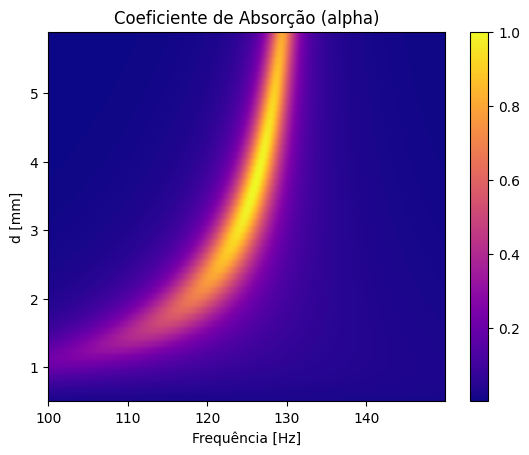

In [ ]:
## Plotagem do Coeficiente de Absorção variando um parâmetro
plt.imshow(alpha_b, extent=[omega.min(), omega.max(), d_disc.min()*1e3, d_disc.max()*1e3], origin='lower', cmap='plasma', aspect='auto', vmax=1)
plt.colorbar()
plt.title('Coeficiente de Absorção (alpha)')
plt.ylabel('d [mm]')
plt.xlabel('Frequência [Hz]')
plt.show()

## Parte (c) - Absorção Sonora variando t

In [ ]:
t_disc = np.arange(0.1e-3, 8e-3, 0.1e-3)
alpha_c = np.zeros((len(t_disc), len(omega)))
for i,t_i in enumerate(t_disc):
  alpha, _, _, _ = model_li(
        omega=omega,
        a=a,
        w=w,
        d=d,
        mi=mi,
        c=c,
        t=t_i,
        rho_0=rho_0
    )
  alpha_c[i] = alpha

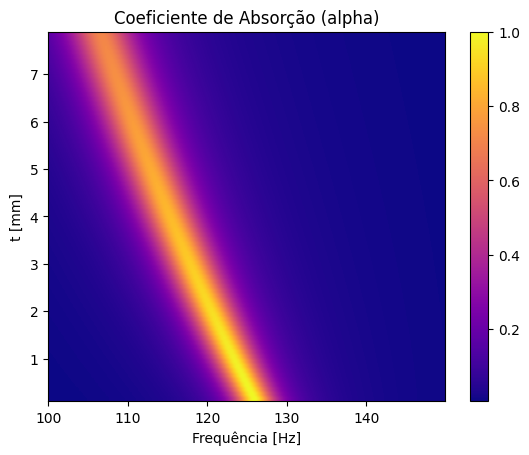

In [ ]:
## Plotagem do Coeficiente de Absorção variando um parâmetro
plt.imshow(alpha_c, extent=[omega.min(), omega.max(), t_disc.min()*1e3, t_disc.max()*1e3], origin='lower', cmap='plasma', aspect='auto', vmax=1)
plt.colorbar()
plt.title('Coeficiente de Absorção (alpha)')
plt.ylabel('t [mm]')
plt.xlabel('Frequência [Hz]')
plt.show()